<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_MN/SequenceINF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/crop_yield_dataset.csv')

In [ ]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
display(df.head())
display(df.isnull().sum())

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0


In [ ]:
df = df[df['Crop_Yield'] != 0.0]
display(df.head())

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
5,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
7,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Crop_Yield', 'Date'], axis=1)
y = df['Crop_Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

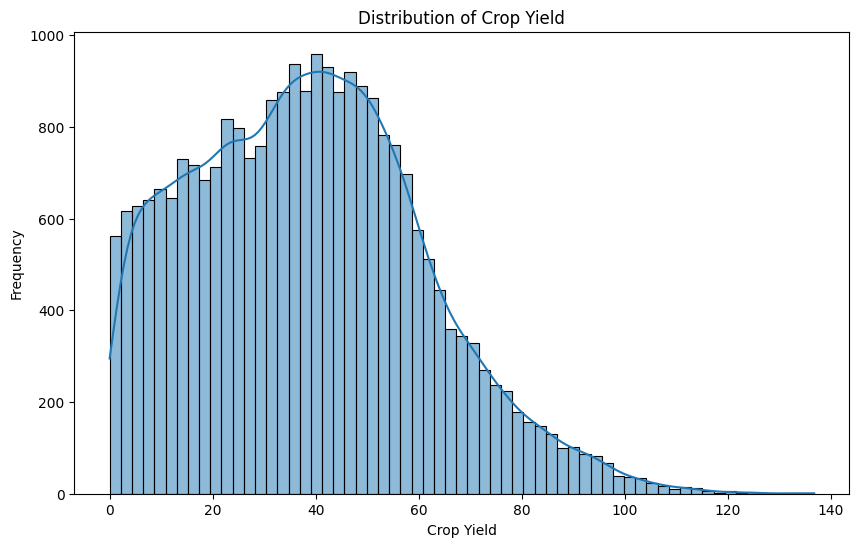

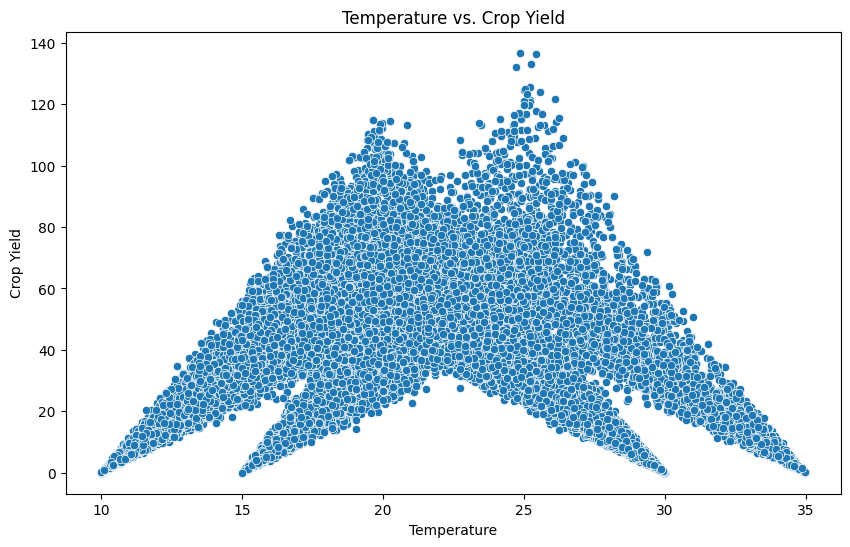

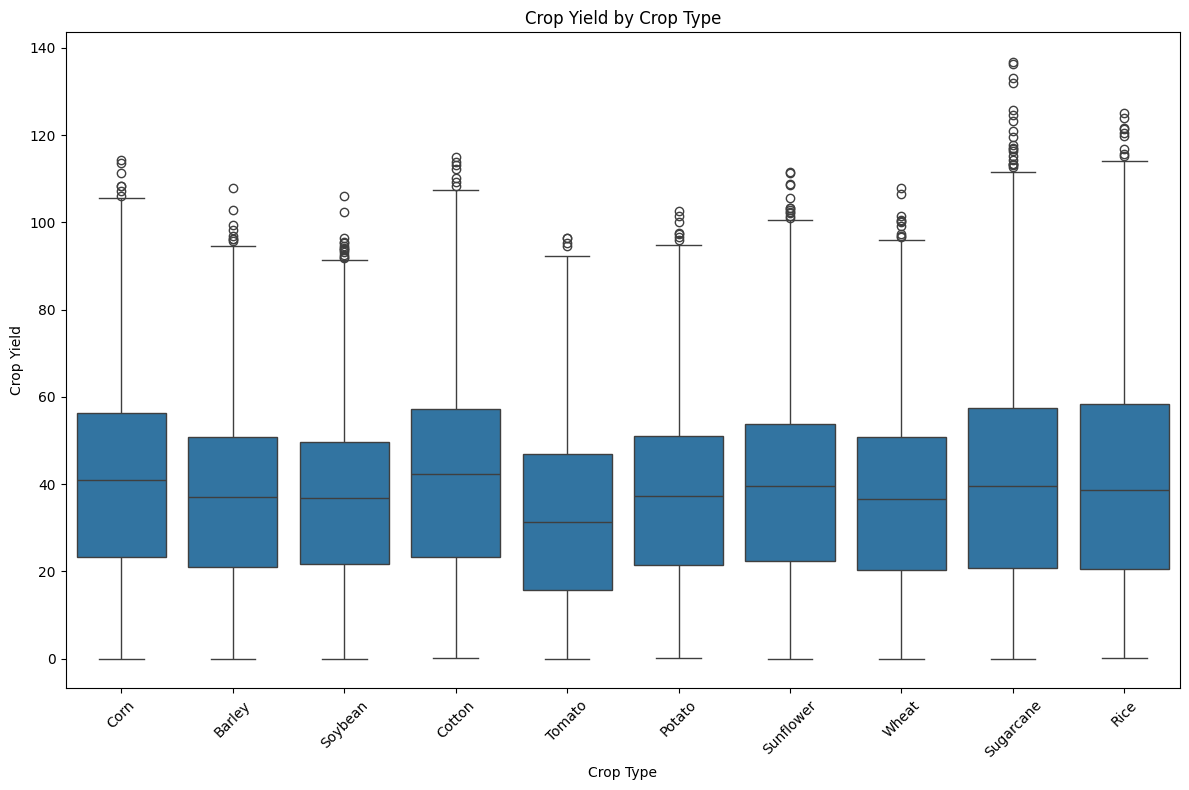

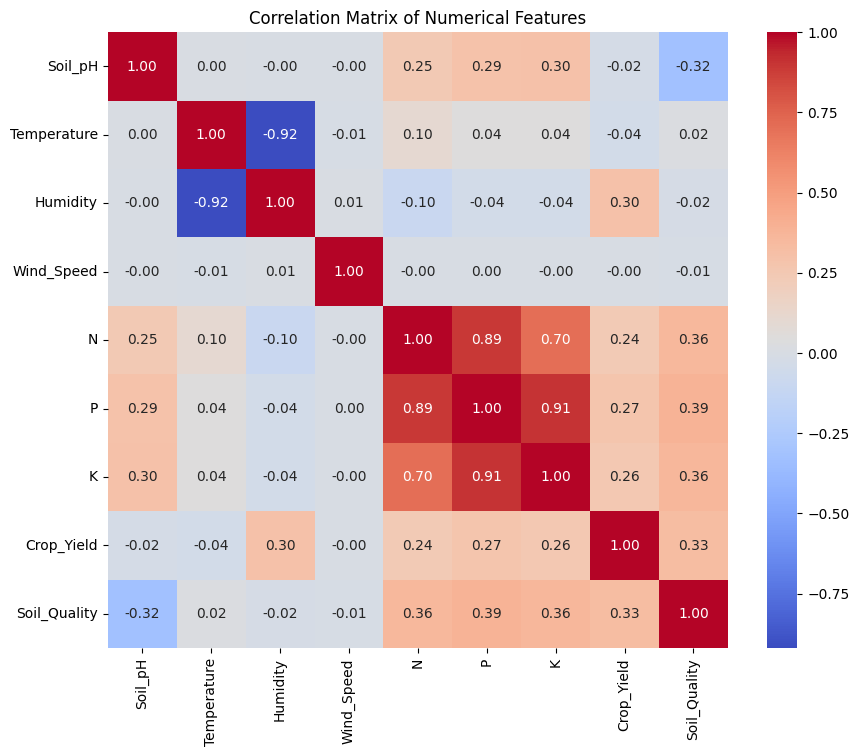

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'Crop_Yield'
plt.figure(figsize=(10, 6))
sns.histplot(df['Crop_Yield'], kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of 'Temperature' vs. 'Crop_Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Crop_Yield', data=df)
plt.title('Temperature vs. Crop Yield')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.show()

# 3. Box plot of 'Crop_Yield' grouped by 'Crop_Type'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop_Type', y='Crop_Yield', data=df)
plt.title('Crop Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Crop Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['Crop_Type', 'Soil_Type']
numerical_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Crop_Type', 'Soil_Type']),
                                                 ('num', 'passthrough',
                                                  ['Soil_pH', 'Temperature',
                                                   'Humidity', 'Wind_Speed',
                                                   'N', 'P', 'K',
                                                   'Soil_Quality'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from category_encoders import LeaveOneOutEncoder

categorical_features = ['Crop_Type', 'Soil_Type']
numerical_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', LeaveOneOutEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Assuming RandomForestRegressor was the best performing model from the previous step
# Replace with the actual best model if different
regressor = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
# Sample Test Prediction
# Assuming X_test and y_test are already defined from the train_test_split step
sample_X = X_test.iloc[[0]]
sample_y = y_test.iloc[0]

# Predict crop yield for that sample using the trained pipeline
pred_y = pipeline.predict(sample_X)[0]

print("\n Sample Test Prediction ")
print(f"Actual Crop Yield : {sample_y:.4f}")
print(f"Predicted Crop Yield : {pred_y:.4f}")


 Sample Test Prediction 
Actual Crop Yield : 17.6036
Predicted Crop Yield : 21.1509


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 12.30
Mean Squared Error (MSE): 267.65
R-squared (R2): 0.47


**Time Series Forecating**

**Reasoning**:
Convert the 'Date' column to datetime objects and set it as the index to prepare the data for time series analysis.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
display(df.head())

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,,,
2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
df_resampled = numerical_df.resample('D').mean()
df_resampled = df_resampled.ffill()
display(df_resampled.head())

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-01,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
2014-01-02,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2014-01-03,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
2014-01-04,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
2014-01-05,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792


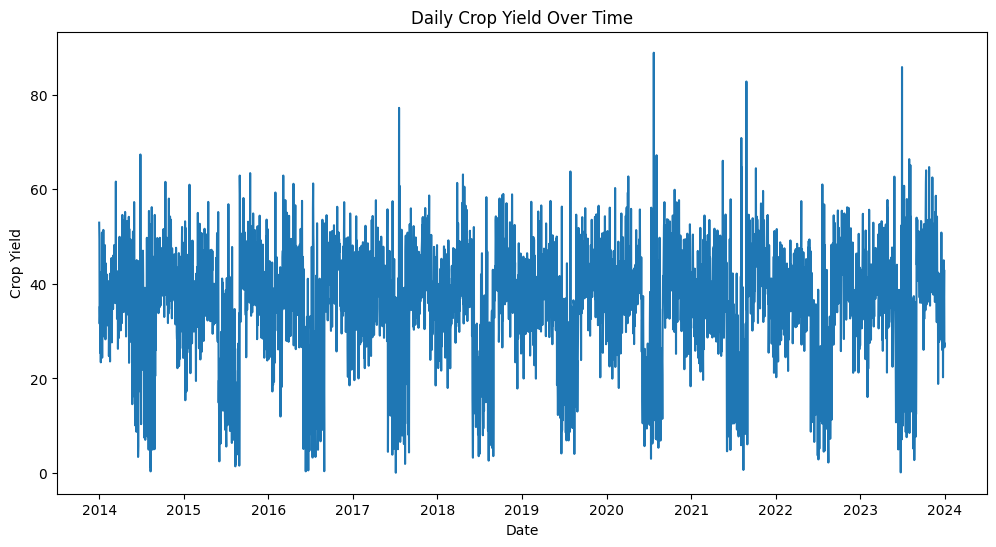

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Crop_Yield'])
plt.title('Daily Crop Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Crop Yield')
plt.show()

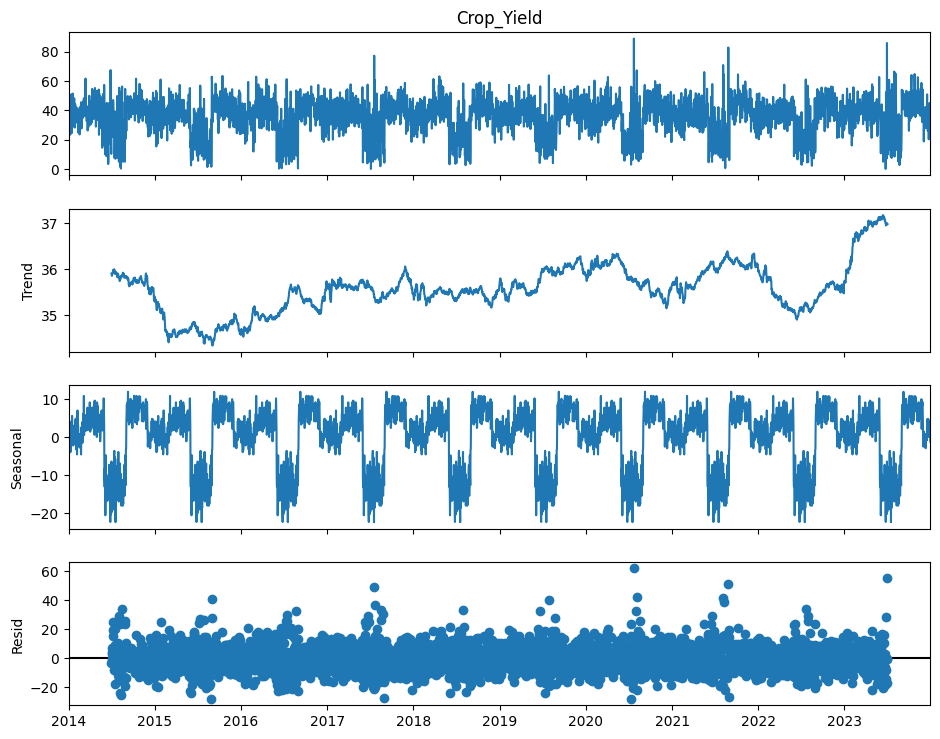

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_resampled['Crop_Yield'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'Crop_Yield' column
adf_test = adfuller(df_resampled['Crop_Yield'])

# Print the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Number of lags used: %i' % adf_test[2])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Check for stationarity based on p-value and critical values
if adf_test[1] <= 0.05:
    print('\nConclusion: The time series is likely stationary (p-value <= 0.05).')
else:
    print('\nConclusion: The time series is likely non-stationary (p-value > 0.05).')

ADF Statistic: -7.495907
p-value: 0.000000
Number of lags used: 11
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

Conclusion: The time series is likely stationary (p-value <= 0.05).


In [ ]:
print("Based on the Augmented Dickey-Fuller test, the time series for 'Crop_Yield' is stationary (p-value < 0.05).")
print("The decomposition plot also clearly shows a strong yearly seasonality.")
print("Therefore, a Seasonal Autoregressive Integrated Moving Average (SARIMA) model is a suitable choice for forecasting this time series as it can handle both stationarity and seasonality.")

Based on the Augmented Dickey-Fuller test, the time series for 'Crop_Yield' is stationary (p-value < 0.05).
The decomposition plot also clearly shows a strong yearly seasonality.
Therefore, a Seasonal Autoregressive Integrated Moving Average (SARIMA) model is a suitable choice for forecasting this time series as it can handle both stationarity and seasonality.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate SARIMAX model with initial orders (p=1, d=0, q=1) and seasonal orders (P=0, D=0, Q=0, S=365)
# Based on the ADF test (stationary, d=0) and decomposition (yearly seasonality, S=365)
# Non-seasonal order (p, d, q): (1, 0, 1) is a common starting point for potentially autoregressive and moving average components in a stationary series.
# Seasonal order (P, D, Q, S): (0, 0, 0, 365) initially assumes no seasonal differencing (D=0) and no seasonal AR or MA components (P=0, Q=0), focusing only on the seasonal period (S=365).
model = SARIMAX(df_resampled['Crop_Yield'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 365))

# Fit the SARIMA model to the data
fitted_model = model.fit()

# Print a summary of the fitted model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                 3652
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -13634.970
Date:                Wed, 05 Nov 2025   AIC                          27275.940
Time:                        10:45:11   BIC                          27294.549
Sample:                    01-01-2014   HQIC                         27282.567
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.001   1394.036      0.000       0.998       1.000
ma.L1         -0.8484      0.008   -110.447      0.000      -0.863      -0.833
sigma2       102.3373      1.561     65.555      0.0

In [ ]:
# Generate future forecasts for a specified number of steps (e.g., 30 days)
forecast_steps = 30
forecast_results = fitted_model.get_forecast(steps=forecast_steps)

# Extract the predicted mean values from the forecast results
predicted_mean = forecast_results.predicted_mean

# Store the forecast results for later use
# The forecast_results object itself contains the predicted mean,
# confidence intervals, and potentially other information depending on the model.
# We can directly use forecast_results for plotting with confidence intervals.
display(predicted_mean.head())

,predicted_mean
2024-01-01,33.569414
2024-01-02,33.537365
2024-01-03,33.505347
2024-01-04,33.473360
2024-01-05,33.441403


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get predictions on the training data
y_train_pred = fitted_model.predict(start=df_resampled.index[0], end=df_resampled.index[-1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(df_resampled['Crop_Yield'], y_train_pred)
mse_train = mean_squared_error(df_resampled['Crop_Yield'], y_train_pred)
r2_train = r2_score(df_resampled['Crop_Yield'], y_train_pred)

# Print the evaluation metrics
print(f'Training Mean Absolute Error (MAE): {mae_train:.2f}')
print(f'Training Mean Squared Error (MSE): {mse_train:.2f}')
print(f'Training R-squared (R2): {r2_train:.2f}')

Training Mean Absolute Error (MAE): 7.62
Training Mean Squared Error (MSE): 103.07
Training R-squared (R2): 0.30


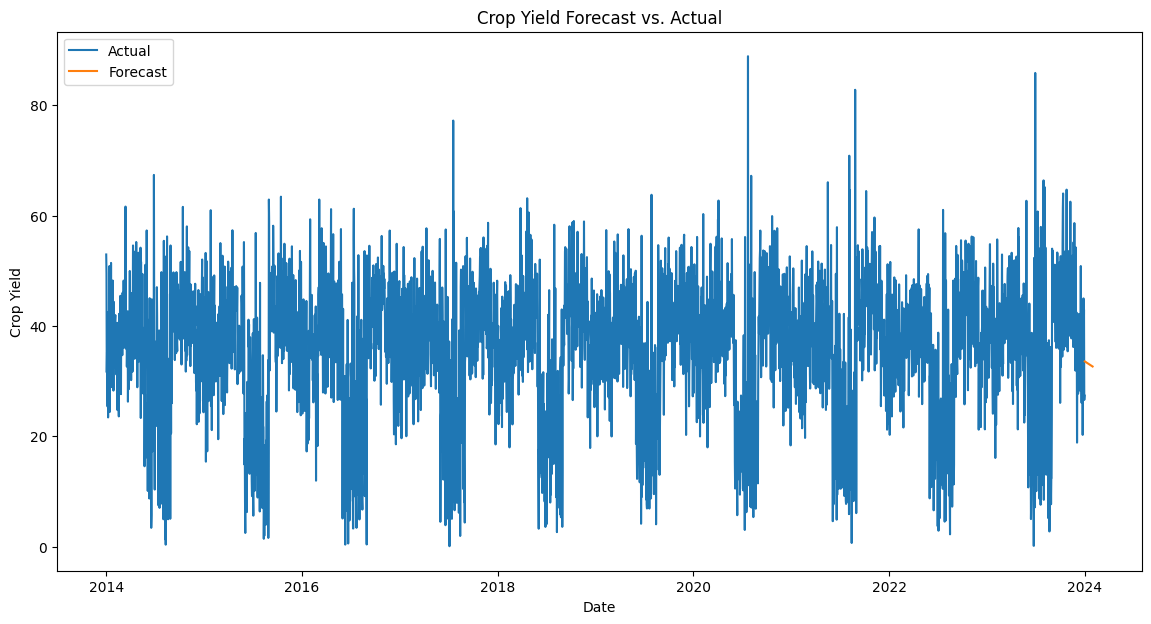

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_resampled.index, df_resampled['Crop_Yield'], label='Actual')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast')
plt.title('Crop Yield Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()